# importing libs

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%notebook inline

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# reading file and checking head

In [3]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

# EDA

In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

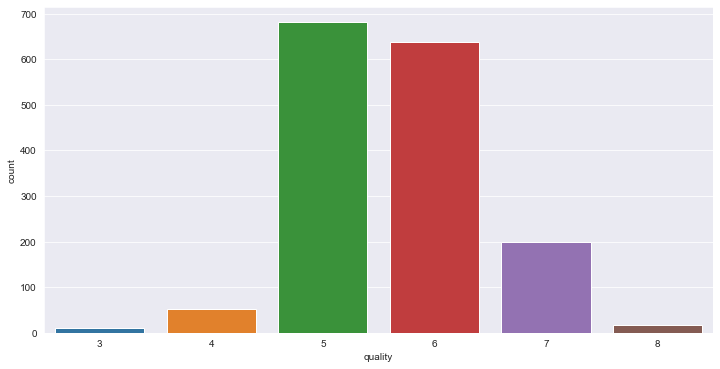

In [7]:
plt.figure(figsize = (12,6))
sns.set_style('darkgrid')
sns.countplot(df['quality'])
plt.show()

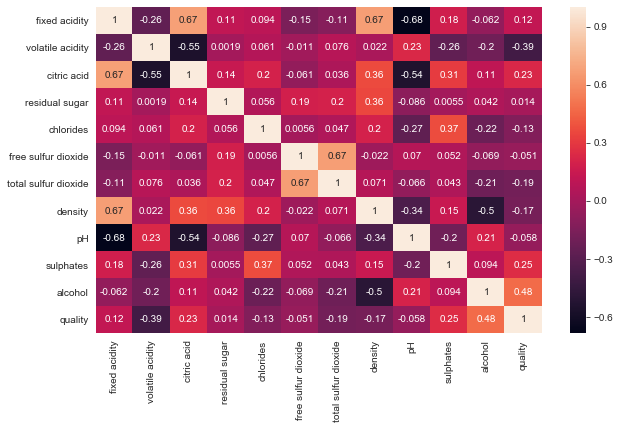

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

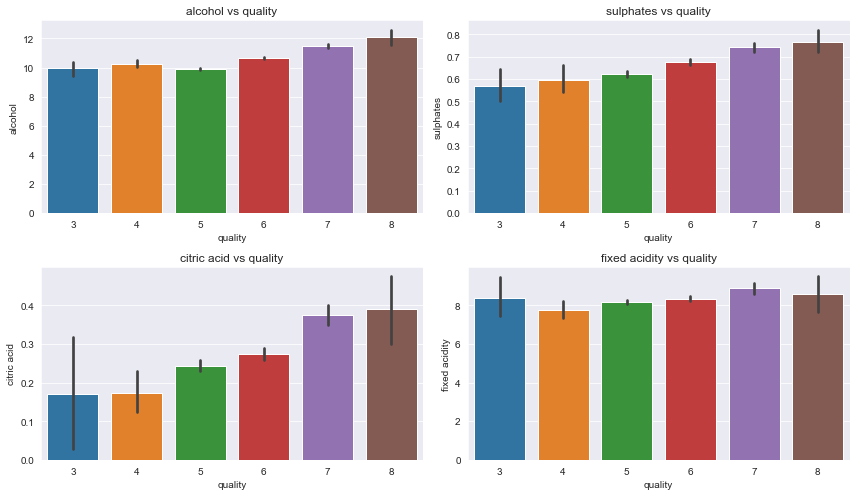

In [9]:
cols = ["alcohol", "sulphates", "citric acid", "fixed acidity"]

plt.figure(figsize=(12,7))

for i,col in enumerate(cols,1):
    plt.subplot(2,2, i)
    sns.barplot(x = 'quality', y = col, data = df)
    plt.title(col + " vs quality")
    plt.tight_layout()

No clear relation bw acidity and quality

Alcohol, suphate, citric acid content increases , quality of wine bumps

# Data cleaning

Outliers

In [10]:
cols = list(df.columns) 
print(cols.pop())
len(cols)

quality


11

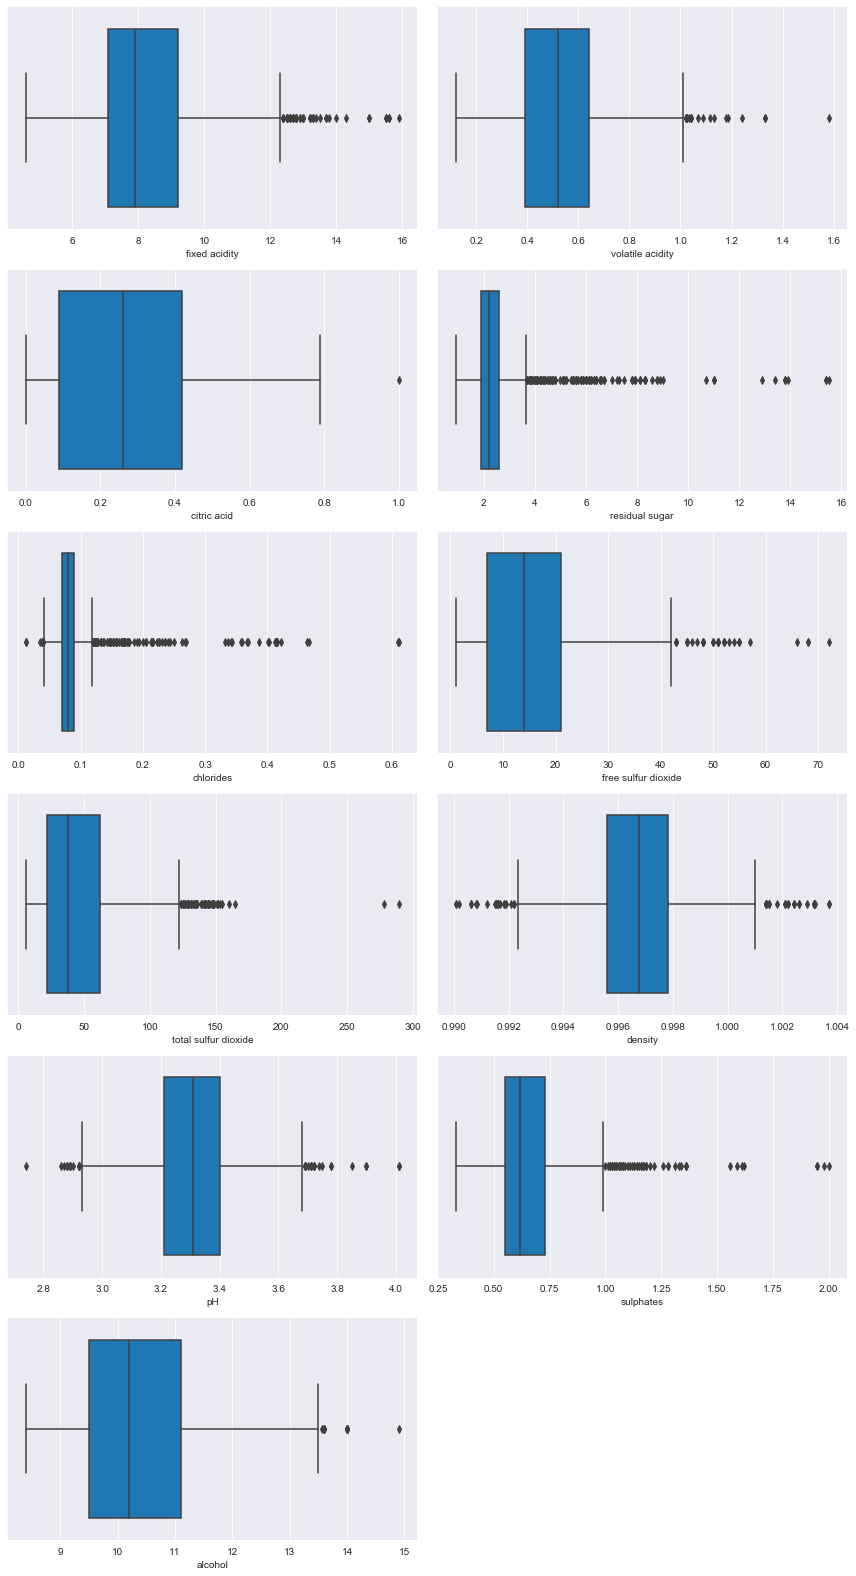

In [11]:
plt.figure(figsize=(12,22))

for i,col in enumerate(cols,1):
    plt.subplot(6,2, i)
    sns.boxplot(df[col], saturation=1)
    plt.tight_layout()

In [12]:
df1=df.copy()
df1.shape

(1599, 12)

In [13]:
def removeOutliers(col, i, df1):
    
    df = df1.copy()
    
    df["zscore" + str(i)] = ((df[col]-df[col].mean()) / df[col].std())
    bool_series = np.abs(df["zscore" + str(i)])<2
    
    df = df[bool_series]
    display(df.head())
    display(df.shape)
    print("outliers removed:", df1.shape[0] - df.shape[0])
    
    return df
    

In [14]:
df1.shape

(1599, 12)

In [15]:
cols = ['alcohol', 'citric acid', 'volatile acidity', 'total sulfur dioxide', 'sulphates', 'residual sugar', 'pH']

for i,col in enumerate(cols,1):
    df1 = removeOutliers(col, i, df1) 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,zscore1
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.959946
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,-0.584594
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,-0.584594
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,-0.584594
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.959946


(1529, 13)

outliers removed: 70


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,zscore1,zscore2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.959946,-1.405251
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,-0.584594,-1.405251
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,-0.584594,-1.198329
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,-0.584594,1.491661
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.959946,-1.405251


(1486, 14)

outliers removed: 43


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,zscore1,zscore2,zscore3
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.959946,-1.405251,0.932517
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,-0.584594,-1.405251,1.931634
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,-0.584594,-1.198329,1.265556
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,-0.584594,1.491661,-1.398757
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.959946,-1.405251,0.932517


(1432, 15)

outliers removed: 54


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,zscore1,zscore2,zscore3,zscore4
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.959946,-1.405251,0.932517,-0.389528
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,-0.584594,-1.405251,1.931634,0.645766
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,-0.584594,-1.198329,1.265556,0.237923
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,-0.584594,1.491661,-1.398757,0.426159
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.959946,-1.405251,0.932517,-0.389528


(1352, 16)

outliers removed: 80


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,zscore1,zscore2,zscore3,zscore4,zscore5
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.959946,-1.405251,0.932517,-0.389528,-0.624445
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,-0.584594,-1.405251,1.931634,0.645766,0.171454
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,-0.584594,-1.198329,1.265556,0.237923,-0.027521
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,-0.584594,1.491661,-1.398757,0.426159,-0.491795
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.959946,-1.405251,0.932517,-0.389528,-0.624445


(1298, 17)

outliers removed: 54


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,zscore1,zscore2,zscore3,zscore4,zscore5,zscore6
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.959946,-1.405251,0.932517,-0.389528,-0.624445,-0.431672
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,-0.584594,-1.405251,1.931634,0.645766,0.171454,0.103778
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,-0.584594,-1.198329,1.265556,0.237923,-0.027521,-0.125701
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,-0.584594,1.491661,-1.398757,0.426159,-0.491795,-0.431672
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.959946,-1.405251,0.932517,-0.389528,-0.624445,-0.431672


(1244, 18)

outliers removed: 54


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,zscore1,zscore2,zscore3,zscore4,zscore5,zscore6,zscore7
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.959946,-1.405251,0.932517,-0.389528,-0.624445,-0.431672,1.339234
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,-0.584594,-1.405251,1.931634,0.645766,0.171454,0.103778,-0.822962
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,-0.584594,-1.198329,1.265556,0.237923,-0.027521,-0.125701,-0.404473
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,-0.584594,1.491661,-1.398757,0.426159,-0.491795,-0.431672,-1.101956
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,-0.959946,-1.405251,0.932517,-0.389528,-0.624445,-0.431672,1.339234


(1191, 19)

outliers removed: 53


In [16]:
df1.shape

(1191, 19)

In [17]:
df1.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'zscore1', 'zscore2',
       'zscore3', 'zscore4', 'zscore5', 'zscore6', 'zscore7'],
      dtype='object')

# Preprocessing

Modifying target variable (quality)

1 - if quality above 6, wine is good

0 - else wine is bad

In [18]:
df1['quality']=[1 if i >6 else 0 for i in df1['quality']]
df1['quality'].value_counts()

0    1055
1     136
Name: quality, dtype: int64

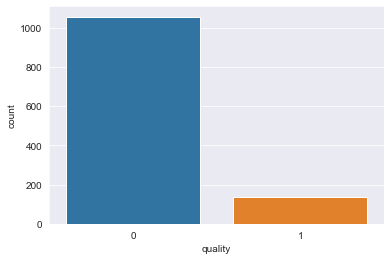

In [19]:
sns.countplot(df1["quality"])

In [20]:
X = df1.drop(df1.loc[:, 'quality':],axis=1)
y = df1['quality']

sc=StandardScaler()
X = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [21]:
X.shape

(1191, 11)

# Building models

In [22]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "        K-Nearest Neighbors Classifier": KNeighborsClassifier(),
    "                        SVM Classifier": SVC(),
    "              Random Forest Classifier": RandomForestClassifier(),
}

training

In [23]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
        K-Nearest Neighbors Classifier trained.
                        SVM Classifier trained.
              Random Forest Classifier trained.


C:\Users\Divyansh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Divyansh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Divyansh\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Evaluation

In [24]:
for name, model in models.items():
    print(name)
    print("--------------------"*3)
    print("Testing Accuracy: {:.5f}".format(model.score(X_test, y_test)))
    print("Training Accuracy: {:.5f}".format(model.score(X_train, y_train)))
    print("--------------------"*3)
    print('\n')    

                   Logistic Regression
------------------------------------------------------------
Testing Accuracy: 0.90503
Training Accuracy: 0.89316
------------------------------------------------------------


        K-Nearest Neighbors Classifier
------------------------------------------------------------
Testing Accuracy: 0.89944
Training Accuracy: 0.91477
------------------------------------------------------------


                        SVM Classifier
------------------------------------------------------------
Testing Accuracy: 0.91061
Training Accuracy: 0.90036
------------------------------------------------------------


              Random Forest Classifier
------------------------------------------------------------
Testing Accuracy: 0.93296
Training Accuracy: 0.98920
------------------------------------------------------------




In [25]:
for name, model in models.items():
    print(name,"\n")
    print(cross_val_score(model, X_test, y_test, cv=5))
    print("-----------------------------------------------------")

                   Logistic Regression 

[0.89041096 0.91666667 0.92957746 0.94366197 0.90140845]
-----------------------------------------------------
        K-Nearest Neighbors Classifier 

[0.90410959 0.91666667 0.92957746 0.90140845 0.90140845]
-----------------------------------------------------
                        SVM Classifier 

[0.89041096 0.91666667 0.92957746 0.91549296 0.90140845]
-----------------------------------------------------
              Random Forest Classifier 

[0.90410959 0.93055556 0.92957746 0.91549296 0.90140845]
-----------------------------------------------------


C:\Users\Divyansh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Divyansh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Divyansh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Divyansh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Divyansh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solv

In [26]:
def evalModel(name, model):
    print(name)
    print("\nConfusion Matrix")
    predictions = model.predict(X_test)
    print(confusion_matrix(y_test,predictions))
    print("\nClassifiation Report")
    print(classification_report(y_test,predictions))
    print("==="*40)

In [27]:
for name, model in models.items():
    evalModel(name, model)

                   Logistic Regression

Confusion Matrix
[[312  10]
 [ 24  12]]

Classifiation Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       322
           1       0.55      0.33      0.41        36

    accuracy                           0.91       358
   macro avg       0.74      0.65      0.68       358
weighted avg       0.89      0.91      0.89       358

        K-Nearest Neighbors Classifier

Confusion Matrix
[[305  17]
 [ 19  17]]

Classifiation Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       322
           1       0.50      0.47      0.49        36

    accuracy                           0.90       358
   macro avg       0.72      0.71      0.71       358
weighted avg       0.90      0.90      0.90       358

                        SVM Classifier

Confusion Matrix
[[317   5]
 [ 27   9]]

Classifiation Report
              precision    recall  f1-sc